Буду использовать набор данных, собранный 'Gapminder Foundation', который содержит набор переменных, используемых для оценки общего 
состояния здоровья и благополучия населения в странах по всему миру. 

In [1]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("gapminder.zip") 
df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [3]:
# функция проверяет пропущенные значения
def check_missing_values(df, cols): 
    for col in cols: 
        print("Column {} is missing:".format(col)) 
        print((df[col].values == ' ').sum()) 
        print() 
        
# функция конвертирует значения в числовые
def convert_numeric(dataframe, cols): 
    for col in cols: 
        dataframe[col] = pd.to_numeric(dataframe[col], 
                                       errors='coerce') 

In [4]:
print("Есть ли пропущенные значения? ", df.isnull().values.any())
print()

cols = ['lifeexpectancy', 'breastcancerper100th', 'suicideper100th',
        'internetuserate', 'employrate']

df2 = df.copy()

check_missing_values(df, cols)

convert_numeric(df2, cols)

Есть ли пропущенные значения?  False

Column lifeexpectancy is missing:
22

Column breastcancerper100th is missing:
40

Column suicideper100th is missing:
22

Column internetuserate is missing:
21

Column employrate is missing:
35



### Проанализируем взаимосвязь между:

    уровнем использования Интернета (internetuserate) и ожидаемой продолжительностью жизни (lifeexpectancy) 


Сделаем отдельные графики для отношения уровней `использования Интернета (internetuserate)` и `продолжительности жизни (lifeexpectancy)` с помощью **Seaborn** и **Matplotlib**.

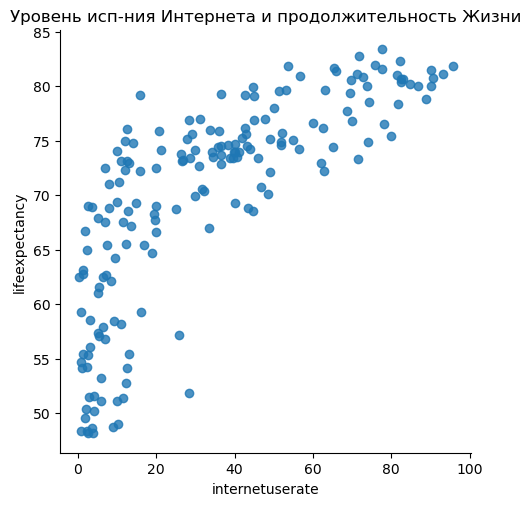

In [5]:
sns.lmplot(x="internetuserate", 
           y="lifeexpectancy",
           data=df2, 
           fit_reg=False)
plt.title("Уровень исп-ния Интернета и продолжительность Жизни")
plt.show()

График несколько напоминает __гиперболу__. Поисследуем пару этих столбцов подробнее

----

## Формулируем гипотезы

**Нулевая гипотеза** – это гипотеза об отсутствии различий. В данном случае - об отсутсвии взаимосвязи между уровнем использования интернета и продолжительностью жизни.

Cоответственно, **альтернативная гипотеза H1** в том, что взаимосвязь между уровнем использования интернета и продолжительностью жизни существует 

----

## Выбор критерия

Проверим гипотезы с помощью критерия __Хи-квадрат__

Критерий независимости Хи-квадрат - это непараметрический стат  критерий, используемый для анализа, насколько значима связь между двумя __категориальными__ переменными.

----

## Обработка данных

Для проверки гипотоез нас интересуют данные двух столбцов `"internetuserate"` и `"lifeexpectancy"`. Они представляют собой вещественные переменные.

Для использования Хи-квадрат критерия нам нужно сделать обе переменные __категориальными__. 

Для этого разделим данные по __корзинкам__ так, что в каждую корзинку попадает одинаковое число объектов. Особенность разбиения в том, что данные упорядочены, и в каждую корзинку попадают достаточно близкие по значениям объекты

In [6]:
# функция для разбиения данных на 10 корзинок

def bin(dataframe, cols):
    for col in cols:
        new_col_name = "{}_bins".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 
                                          10, 
                                          labels=["10%", "20%", "30%", "40%", 
                                                  "50%", "60%", "70%", "80%", 
                                                  "90%", "100%"])
        
df3 = df2.copy()

# применяем функцию разбиения данных на 10 частей 
# для столбца Продолжительность жизни lifexpectancy
column = ['lifeexpectancy'] 
bin(df3, column)

In [7]:
df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,lifeexpectancy_bins
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,,0,,6.684385,55.700001,24.04,10%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,,9,636.341383366604,7.699330,51.400002,46.72,80%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,.42009452521537,2,590.509814347428,4.848770,50.500000,65.22,50%
3,Andorra,21943.3398976022,10.17,,NaN,,,,81.000000,NaN,,,,5.362179,NaN,88.92,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,,-2,172.999227388199,14.554677,75.699997,56.7,10%


In [8]:
# функция для разбиения данных на 2 корзинки

def half_bin(dataframe, cols):
    for col in cols:
        new_col_name = "{}_bins_2".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 2, labels=["50%", "100%"])

half_bin(df3, ['internetuserate'])

In [9]:
df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,lifeexpectancy_bins,internetuserate_bins_2
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,,0,,6.684385,55.700001,24.04,10%,50%
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,,9,636.341383366604,7.699330,51.400002,46.72,80%,100%
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,.42009452521537,2,590.509814347428,4.848770,50.500000,65.22,50%,50%
3,Andorra,21943.3398976022,10.17,,NaN,,,,81.000000,NaN,,,,5.362179,NaN,88.92,NaN,100%
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,,-2,172.999227388199,14.554677,75.699997,56.7,10%,50%


Выполнение теста Хи-квадрат включает в себя сначала построение __таблицы сопряженности__. 

In [10]:
count_table = pd.crosstab(df3['internetuserate_bins_2'], 
                          df3['lifeexpectancy_bins']
                         )
print(count_table)
# каждая ячейка на персечении столбца и строки содержит 
# число объектов, попадающее в обе корзинки

lifeexpectancy_bins     10%  20%  30%  40%  50%  60%  70%  80%  90%  100%
internetuserate_bins_2                                                   
50%                      18   19   16   14   12    6    4    4    1     0
100%                      0    0    1    4    6   13   15   11   16    19


Заметна тенденция, что с увеличением использования интернета, продолжительность жизни увелчивается и наоборот.

Теперь вычислим таблицы сопряженности для различных пар корзинок столбца `lifeexpectancy`

Сейчас у нас 10 корзинок, а нужно сделать сравнение лишь для 2 из них 

In [11]:
# Создадим словари для различных пар корзинок продолжительности жизни
recode_3_7 = {"30%": "30%", "70%": "70%"}  # сравниваем корзинки 3 и 7
recode_2_8 = {"20%": "20%", "80%": "80%"}  # сравниваем корзинки 2 и 8
recode_6_9 = {"60%": "60%", "90%": "90%"}  # сравниваем корзинки 6 и 9
recode_4_7 = {"40%": "40%", "70%": "70%"}  # сравниваем корзинки 4 и 7

# Создадим столбцы, которые будут хранить только соответствующие категории
# а остальные значения - убирать. 
df3['Comp_3v7'] = df3['lifeexpectancy_bins'].map(recode_3_7)
df3['Comp_2v8'] = df3['lifeexpectancy_bins'].map(recode_2_8)
df3['Comp_6v9'] = df3['lifeexpectancy_bins'].map(recode_6_9)
df3['Comp_4v7'] = df3['lifeexpectancy_bins'].map(recode_4_7)

df3.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,...,relectricperperson,suicideper100th,employrate,urbanrate,lifeexpectancy_bins,internetuserate_bins_2,Comp_3v7,Comp_2v8,Comp_6v9,Comp_4v7
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.654122,48.673,...,,6.684385,55.700001,24.04,10%,50%,NaN,NaN,NaN,NaN
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,...,636.341383366604,7.699330,51.400002,46.72,80%,100%,NaN,80%,NaN,NaN
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,...,590.509814347428,4.848770,50.500000,65.22,50%,50%,NaN,NaN,NaN,NaN
3,Andorra,21943.3398976022,10.17,,NaN,,,,81.000000,NaN,...,,5.362179,NaN,88.92,NaN,100%,NaN,NaN,NaN,NaN
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,...,172.999227388199,14.554677,75.699997,56.7,10%,50%,NaN,NaN,NaN,NaN


In [12]:
# так же можем составить таблицы сопряженности для этих пар корзинок

count_table_3_7 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_3v7'])
count_table_2_8 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_2v8'])
count_table_6_9 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_6v9'])
count_table_4_7 = pd.crosstab(df3['internetuserate_bins_2'], df3['Comp_4v7'])

# посмотрим на первую
count_table_3_7

Comp_3v7,30%,70%
internetuserate_bins_2,,
50%,16,4
100%,1,15


И вот уже для такой таблицы сопряженности проведем критерий хи-квадрат

Он позволит ответить на вопрос есть ли связь между категориальными переменными - уровнем пользования интренетом и продолжительностью жизни.

In [13]:
# создадим функцию, которая будет возвращать 
# значение критерия хи-квадрат

def chi_sq_test(table):

    print("Рассматривает такую таблицу сопряженности:\n")

    # Вместо количества объектов в ячейках
    # вычислим долю объектов в этой группе среди остальных
    col_sum = table.sum(axis=0)
    col_percents = table/col_sum
    print(col_percents)
    print()
    
    chi_square, p, a, b = scipy.stats.chi2_contingency(table)
    print('P_value = ', p)
    
    if p > 0.05:
        print('Не отвергаем Ho, cтатистически значимых отличий нет')
    else:
        print('Не принимаем Ho, cтатистически значимые отличия есть')

    

In [14]:
# сравним группы 3 и 7
chi_sq_test(count_table_3_7)

Рассматривает такую таблицу сопряженности:

Comp_3v7                     30%       70%
internetuserate_bins_2                    
50%                     0.941176  0.210526
100%                    0.058824  0.789474

P_value =  4.7322137795376575e-05
Не принимаем Ho, cтатистически значимые отличия есть


In [15]:
# сравним группы 2 и 8
chi_sq_test(count_table_2_8)

Рассматривает такую таблицу сопряженности:

Comp_2v8                20%       80%
internetuserate_bins_2               
50%                     1.0  0.266667
100%                    0.0  0.733333

P_value =  3.0560286589975315e-05
Не принимаем Ho, cтатистически значимые отличия есть


In [16]:
# сравним группы 6 и 9
chi_sq_test(count_table_6_9)

Рассматривает такую таблицу сопряженности:

Comp_6v9                     60%       90%
internetuserate_bins_2                    
50%                     0.315789  0.058824
100%                    0.684211  0.941176

P_value =  0.12774517376836148
Не отвергаем Ho, cтатистически значимых отличий нет


In [17]:
# сравним группы 4 и 7
chi_sq_test(count_table_4_7)

Рассматривает такую таблицу сопряженности:

Comp_4v7                     40%       70%
internetuserate_bins_2                    
50%                     0.777778  0.210526
100%                    0.222222  0.789474

P_value =  0.0017998260000241526
Не принимаем Ho, cтатистически значимые отличия есть


Использование интернета влияет на продолжительность жизни с уровнем значимости p=0.05: если internetuserate 50% и ниже, то lifeexpectancy вцелом ниже. Однако, если internetuserate 60% и выше, то уже статистически значимых отличий нет. 